In [1]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

def remove_urls(txt):
    """Removes urls from a given text."""
    pattern = r'https?://\S+'
    return re.sub(pattern, '', txt)

# Counting Tweets

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
ida_counts = {}

while start_date <= end_date:
    df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
        ida_counts[str(start_date)] = len(df2) + len(df1)
    else:
        ida_counts[str(start_date)] = len(df1)
    start_date += delta

print(ida_counts)

In [5]:
print('Total:', sum(ida_counts.values()))

Total: 2693433


In [2]:
number_of_tweets = [5603, 29362, 27086, 86797, 51808, 14014, 7520, 36031, 16220, 6531, 4756, 3557, 4688, 3069, 1460, 1140, 533, 1269, 1267]
sum(number_of_tweets)

302711

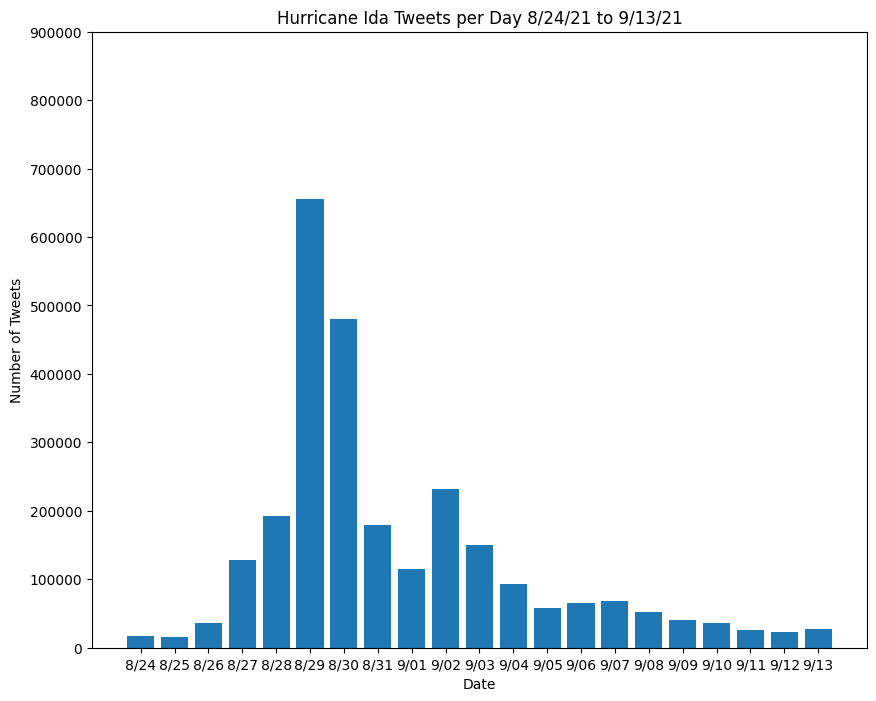

In [49]:
# Combined Datasets
ida_counts = {'2021-08-24': 17080, '2021-08-25': 16329, '2021-08-26': 36003, '2021-08-27': 128194, '2021-08-28': 192546, '2021-08-29': 656247, '2021-08-30': 480298, '2021-08-31': 179025, '2021-09-01': 115459, '2021-09-02': 232486, '2021-09-03': 149829, '2021-09-04': 92485, '2021-09-05': 57513, '2021-09-06': 65707, '2021-09-07': 67638, '2021-09-08': 52880, '2021-09-09': 40301, '2021-09-10': 36607, '2021-09-11': 25939, '2021-09-12': 23181, '2021-09-13': 27686}
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(10,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.ylim(0, 9e5)
plt.title('Hurricane Ida Tweets per Day 8/24/21 to 9/13/21')
plt.bar(range(len(ida_counts)), list(ida_counts.values()))
plt.show()

## Max Wind Speeds

[35, 70, 80, 130, 105, 30, 30, 40, 45, 45]


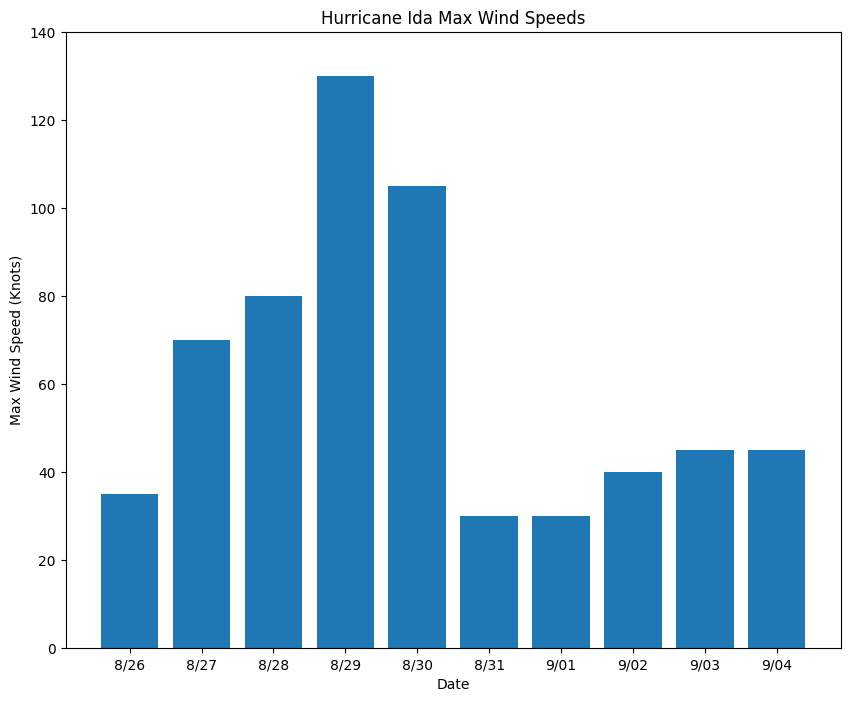

In [18]:
ida_track = pd.read_csv('ida_track.csv')
ida_track['Date'] = pd.to_datetime(ida_track['Date'], format='%Y%m%d')
max_wind = []
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 4)
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    sub = ida_track[ida_track['Date'].dt.date.astype('str') == str(start_date)]
    max_wind.append(max(sub['Max Wind']))
    start_date += delta
print(max_wind)
dates = pd.date_range(start='08/26/2021', end='09/04/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(10,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Max Wind Speed (Knots)')
plt.ylim(0,140)
plt.title('Hurricane Ida Max Wind Speeds')
plt.bar(x=range(len(max_wind)), height=max_wind)
plt.show()

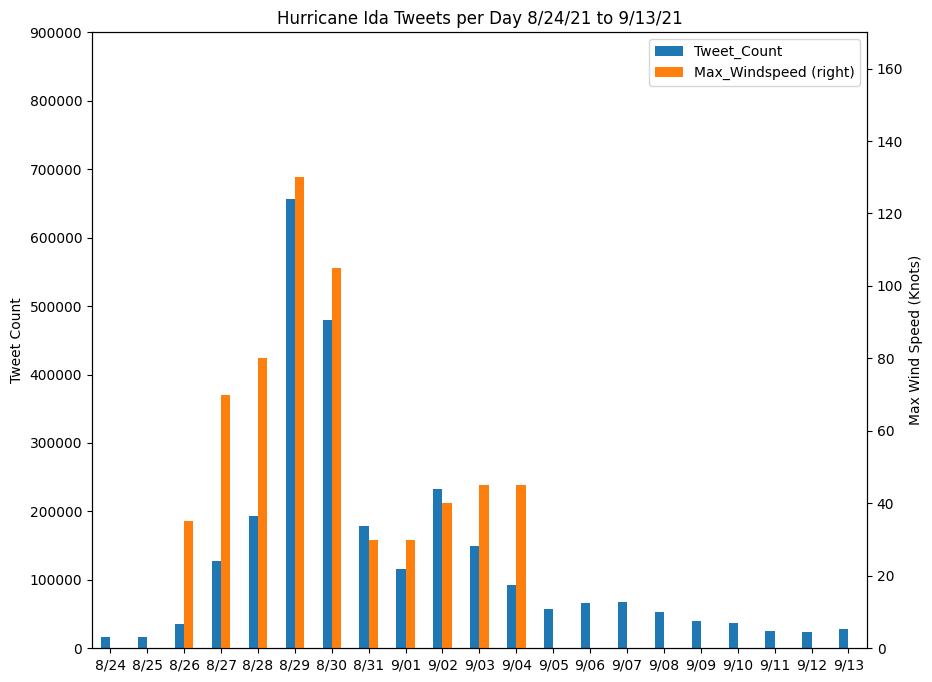

In [53]:
max_wind = [0, 0, 35, 70, 80, 130, 105, 30, 30, 40, 45, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data = {'Tweet_Count':list(ida_counts.values()), 'Max_Windspeed':max_wind}
df = pd.DataFrame(data)
df.plot(kind = 'bar' , secondary_y = 'Max_Windspeed' , rot = 0, figsize = (10,8), title = 'Hurricane Ida Tweets per Day 8/24/21 to 9/13/21')
ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
ax1.set_ylabel('Tweet Count')
ax1.set_ylim(0,9e5)
ax1.set_xticks(range(len(dates)), formatted_dates)
ax2.set_ylabel('Max Wind Speed (Knots)')
ax2.set_ylim(0,170)
plt.savefig('charts/tweets_per_day_ida2.png')
plt.show()

# Combining datasets

We have data searched on two different keywords, so it would be helpful to combine them during the analysis.

In [2]:
df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-09-13.csv")
del df1[df1.columns[0]]
df1.drop(df1.iloc[:, -4:], inplace=True, axis=1)
df1.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,tyler_bourque,Terrebonne high assistant 🏈🏀,False,NaN,247,Mon Sep 13 23:57:03 +0000 2021,1.437566e+18,@Louisiana5A @RenardSports Thib high was a mi...,0,Louisiana5A,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BudLatanville,Kind of a mess. Good for a quip. He/Him/They/T...,False,"East York, ON",245,Mon Sep 13 23:55:35 +0000 2021,1.437566e+18,"This reminds me that, based on how little cont...",0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HenryLeerhenry,Every day is Earth Day & I vote we start inves...,False,"Olathe, KS",4595,Mon Sep 13 23:53:38 +0000 2021,1.437565e+18,RT @nolaready: If you have #Ida roof damage &a...,50,NaN,en,nolaready,We are the City of NOLA emergency preparedness...,True,"New Orleans, LA",55787.0,Mon Sep 13 17:54:59 +0000 2021,1.437475e+18,If you have #Ida roof damage &amp; don't have ...,50.0
3,WeatherSullivan,Bloomberg News Reporter. Tweets are mine/ retw...,True,Boston,1495,Mon Sep 13 23:53:19 +0000 2021,1.437565e+18,"RT @rhjameson: Louisiana, grappling to recover...",1,NaN,en,rhjameson,"Editor, LatAm EcoGov @business - husband, dad,...",True,"New York, NY",3441.0,Mon Sep 13 23:37:29 +0000 2021,1.437561e+18,"Louisiana, grappling to recover from Hurricane...",1.0
4,BoneKnightmare,Fleet Admiral of #TheResistance since Day 0. N...,False,Parts Unknown,4293,Mon Sep 13 23:52:52 +0000 2021,1.437565e+18,RT @NOLAnews: One third of New Orleans still h...,16,NaN,en,NOLAnews,Latest news and updates from the Pulitzer Priz...,True,"New Orleans, LA",271619.0,Mon Sep 13 21:15:12 +0000 2021,1.437525e+18,One third of New Orleans still hasn't seen its...,16.0


In [3]:
df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_2021-09-13.csv")
del df2[df2.columns[0]]
df2.drop(df2.iloc[:, -4:], inplace=True, axis=1)
df2.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,GregMercerMSN,DMs deleted. Charge Nurse on a psych unit. Hap...,False,NaN,3144,Mon Sep 13 23:59:59 +0000 2021,1.437567e+18,"@StephenKing I want a Hurricane Greg, just so ...",0,StephenKing,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rjorozcos,NaN,False,NaN,168,Mon Sep 13 23:59:57 +0000 2021,1.437567e+18,RT @breakingweather: Tropical Storm #Nicholas ...,40,NaN,en,breakingweather,Breaking weather alerts and timely weather new...,True,"State College, PA",1044559.0,Mon Sep 13 11:10:01 +0000 2021,1.437373e+18,Tropical Storm #Nicholas is expected to make l...,40.0
2,CamdenOakCrest,Schedule a tour today! 281.920.0800,False,"Houston, Texas",586,Mon Sep 13 23:59:50 +0000 2021,1.437567e+18,Hurricane season is here and it’s time to make...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nanobowers,"Father, husband, rubyist, chip designer, LSU, ...",False,NaN,58,Mon Sep 13 23:59:44 +0000 2021,1.437567e+18,Drunken hurricane staggers back to New Orleans...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Outtasites,Pork chop sandwishes,False,NaN,98,Mon Sep 13 23:59:43 +0000 2021,1.437567e+18,RT @JudgeKPGeorge: Is it a hurricane watch or ...,113,NaN,en,JudgeKPGeorge,"Proud Christian, Father, Husband. County Judge...",True,Fort Bend County,7237.0,Mon Sep 13 23:45:05 +0000 2021,1.437563e+18,Is it a hurricane watch or a warning? Fort Ben...,113.0


In [4]:
df = pd.concat([df1, df2])
df = df.sort_values('time')
df = df.reset_index(drop=True)
df.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,amandatoryy,@motorbiscuit,False,NaN,168,Mon Sep 13 00:00:00 +0000 2021,1.437204e+18,General Lee will be back in no time! What was ...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RandomCAHBot,All views expressed are randomly generated and...,False,NaN,227,Mon Sep 13 00:00:03 +0000 2021,1.437204e+18,"After Hurricane Katrina, Sean Penn brought 𝗮 𝗺...",0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ReserveOrg,Founded in 1922 and chartered by Congress in 1...,False,"Washington, DC",1441,Mon Sep 13 00:00:03 +0000 2021,1.437204e+18,@OKGuard headed to Louisiana in response to Hu...,0,OKGuard,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wtpickens1,Living on a little blue island in a sea of red.,False,"Austin, TX",634,Mon Sep 13 00:00:04 +0000 2021,1.437204e+18,RT @LinaHidalgoTX: Gov. @GregAbbott_TX and I a...,310,NaN,en,LinaHidalgoTX,Harris County Judge (executive of our nation’s...,True,"Harris County, TX",131831.0,Sun Sep 12 22:22:35 +0000 2021,1.437180e+18,Gov. @GregAbbott_TX and I are in touch about p...,310.0
4,Hurricane_765,Still waiting for someone to surprise dm me✨,False,NaN,7,Mon Sep 13 00:00:07 +0000 2021,1.437204e+18,RT @CryptoGeum: [ reroll ]\n\n$30 || P1380 || ...,4152,NaN,en,CryptoGeum,Shill & Promoter || DM for inquiries 📩 || vouc...,False,Seoul,80851.0,Sun Sep 12 23:58:06 +0000 2021,1.437204e+18,[ reroll ]\n\n$30 || P1380 || 393.000 IDR\n\n-...,4152.0


# Sentiment by Day

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
avg_sentiment = []
ida_counts = []
analyzer = SentimentIntensityAnalyzer()

while start_date <= end_date:
    df = pd.DataFrame()
    if start_date >= datetime.date(2021, 8, 26):
        df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
        df = pd.concat([df1, df2])
    else:
        df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    # df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df['text'] = [remove_urls(tweet) for tweet in df['text']]
    df = df.drop_duplicates(subset=['text'])
    ida_counts.append(len(df))
    print(start_date)

    compound_scores = []
    for sentence in df['text']:
        vs = analyzer.polarity_scores(sentence)
        #print("{:-<65} {}".format(sentence, str(vs)))
        compound_scores.append(vs['compound'])
    avg_sentiment.append(statistics.mean(compound_scores))
    # print(statistics.mean(compound_scores))

    start_date += delta

In [71]:
pd.Series(avg_sentiment).describe()

count    21.000000
mean      0.044658
std       0.039353
min      -0.040796
25%       0.019263
50%       0.048715
75%       0.070510
max       0.114749
dtype: float64

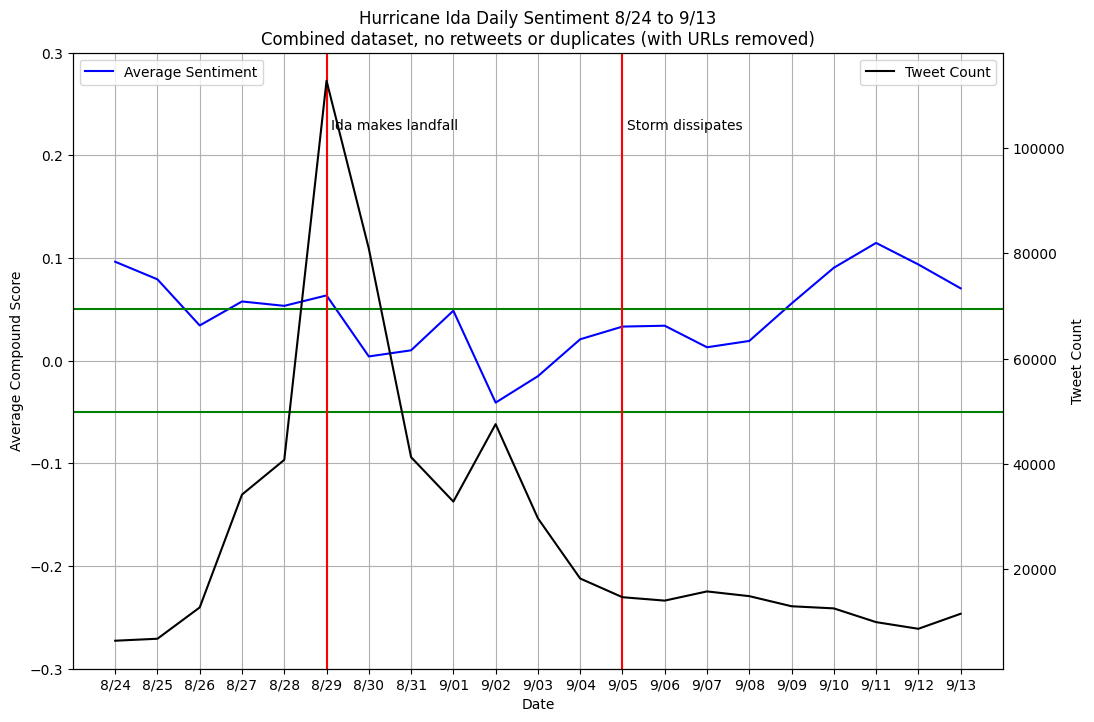

In [73]:
# daily, storm ida dataset, no retweets or duplicates
# avg_sentiment = [-0.012052424800491094, 0.03498209083119109, 0.024268395162943227, 0.026317105934364905, -0.10715553180117585, -0.04543845777233782, -0.0822336048879837, -0.2063763122476447, -0.2373101629384148, -0.19122349551856593, -0.15488313609467455, -0.15128189158016148, -0.20969854452054795, -0.21840665322580646, -0.13758865384615385, -0.12669507772020724, -0.09953448275862069, -0.12508311688311688, -0.11207890625]
# daily, combined dataset, no retweets or duplicates
# avg_sentiment = [0.0920172585013542, 0.0792331340734415, 0.02690113913751017, 0.0482891275096958, 0.041497891744122474, 0.05525841628813505, -0.010804174425150479, -0.00205883995748317, 0.03523305061559508, -0.05721815065899106, -0.03044471579074471, 0.0055747494033412896, 0.017824486137667305, 0.021629987892691008, 0.027213173812965043, 0.006326166519564579, 0.04794900562337128, 0.08325294326998363, 0.1062287846282996, 0.08873051891891892, 0.0680368695516812]
# daily, combined dataset, no retweets or duplicates (with URLs removed)
ida_counts = [6320, 6698, 12656, 34124, 40736, 112873, 80933, 41244, 32795, 47529, 29617, 18157, 14599, 13951, 15700, 14802, 12878, 12472, 9858, 8588, 11450]
avg_sentiment = [0.09640365506329114, 0.07927078232308152, 0.034357640644753475, 0.05770702438166686, 0.053445139434406916, 0.0636080967104622, 0.004170029530599385, 0.010136941130831151, 0.04871528281750267, -0.04079638536472469, -0.015068896242023162, 0.020878834609241614, 0.03324940749366395, 0.03408918357107017, 0.01310015923566879, 0.019263281988920418, 0.05572018947041466, 0.09054283194355356, 0.11474909717995536, 0.09375751047973917, 0.07050958951965065]
plt.figure(figsize=(12,8))
plt.plot(avg_sentiment, label='Average Sentiment', color='blue')
plt.legend(loc='upper left')
plt.grid()
# axes
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(avg_sentiment)), formatted_dates)
plt.ylim([-.3, .3])
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
# thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# timeline
bottom, top = plt.ylim()
landfall = len(dates) - 16
plt.axvline(x=landfall, color='red')
plt.text(landfall+.1, top*.75, 'Ida makes landfall')
dissipation = len(dates) - 9
plt.axvline(x=dissipation, color='red')
plt.text(dissipation+.1, top*.75, 'Storm dissipates')
# tweet counts
plt.twinx()
plt.plot(ida_counts, label='Tweet Count', color = 'black')
plt.ylabel('Tweet Count')
# title
plt.title('Hurricane Ida Daily Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nCombined dataset, no retweets or duplicates (with URLs removed)')
plt.legend()
plt.savefig('sentiment analysis/Ida/sentiment_daily_ida3.png')
plt.show()

# Sentiment by Hour

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
avg_sentiment_hourly = []
ida_counts_hourly = []
analyzer = SentimentIntensityAnalyzer()

while start_date <= end_date:
    df = pd.DataFrame()
    if start_date >= datetime.date(2021, 8, 26):
        df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
        df = pd.concat([df1, df2])
    else:
        df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    # df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df['text'] = [remove_urls(tweet) for tweet in df['text']]
    df = df.drop_duplicates(subset=['text'])
    print(start_date)

    for hour in range(24):
        compound_scores = []
        df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
        ida_counts_hourly.append(len(df_sub))
        if len(df_sub['text']) > 0:
            for sentence in df_sub['text']:
                if type(sentence) != int:
                    vs = analyzer.polarity_scores(sentence)
                    #print("{:-<65} {}".format(sentence, str(vs)))
                    compound_scores.append(list(vs.values())[3])
            avg_sentiment_hourly.append(statistics.mean(compound_scores))
        else:
            avg_sentiment_hourly.append(0)

    start_date += delta

In [79]:
pd.Series(avg_sentiment_hourly).describe()

count    504.000000
mean       0.041782
std        0.051035
min       -0.121634
25%        0.011535
50%        0.042606
75%        0.073392
max        0.223355
dtype: float64

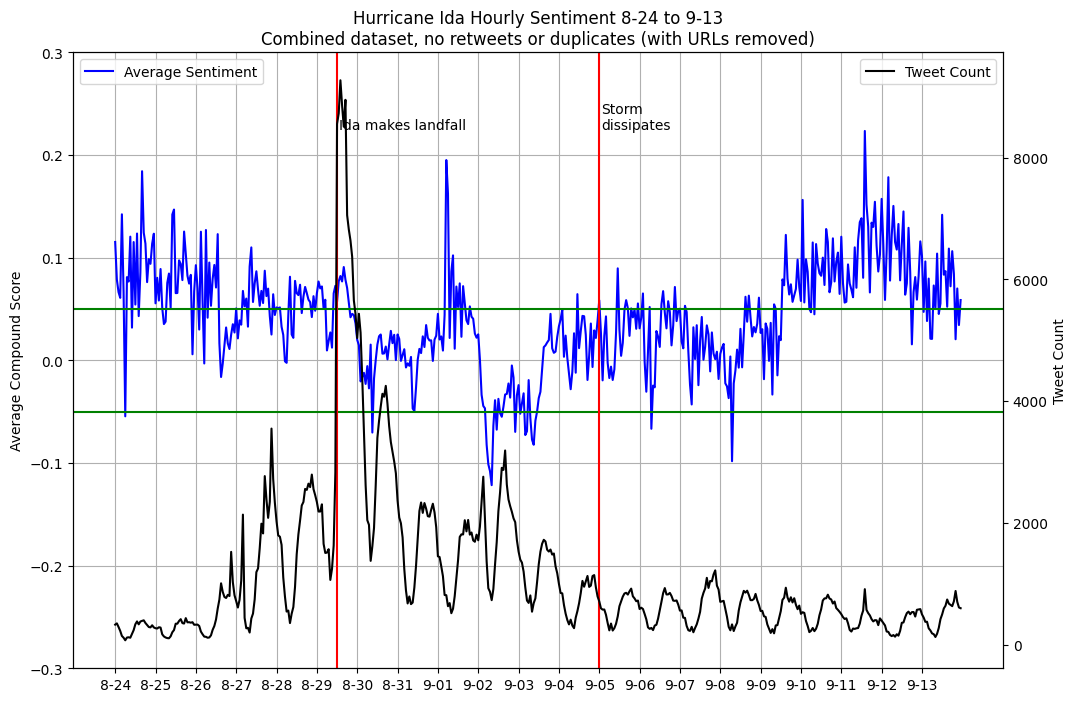

In [84]:
plt.figure(figsize=(12,8))
plt.plot(avg_sentiment_hourly, label='Average Sentiment', color='blue')
plt.legend(loc='upper left')
plt.grid()
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m-%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(avg_sentiment_hourly), 24), formatted_dates)
plt.ylabel('Average Compound Score')
plt.ylim([-.3, .3])
bottom, top = plt.ylim()
# positive, neutral, negative thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# storm timeline
landfall = 24*(len(dates) - 15.5)
plt.axvline(x=landfall, color='red')
plt.text(landfall+1,top*.75,'Ida makes landfall')
dissipation = 24*(len(dates) - 9)
plt.axvline(x=dissipation, color='red')
plt.text(dissipation+1,top*.75,'Storm\ndissipates')
# tweet counts
plt.twinx()
plt.plot(ida_counts_hourly, label='Tweet Count', color='black')
plt.ylabel('Tweet Count')
plt.legend()
# labels
plt.xlabel('Date')
plt.title('Hurricane Ida Hourly Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nCombined dataset, no retweets or duplicates (with URLs removed)')
plt.savefig('sentiment analysis/Ida/sentiment_hourly_ida2.png')
plt.show()

In [11]:
avg_sentiment_hourly

[-0.12163443072702332,
 -0.10795854503464203,
 -0.10125718918918919,
 -0.09830060422960725,
 -0.08229808823529411,
 -0.0822679355783309,
 -0.07733222222222222,
 -0.07282569296375266,
 -0.07038587360594796,
 -0.0697399801093983,
 -0.06909474412171508,
 -0.06756739904988124,
 -0.06670366300366301,
 -0.06386725082146769,
 -0.058839789196310936,
 -0.05613085501858736,
 -0.055029958677685946,
 -0.05459714285714286,
 -0.052054831782390835,
 -0.05149992012779552,
 -0.05010263671875,
 -0.049496162046908314,
 -0.046956811594202896,
 -0.046788091752074185,
 -0.045279825783972126,
 -0.044478680203045684,
 -0.04302852233676976,
 -0.041829420505200596,
 -0.03888738601823708,
 -0.03755624430264357,
 -0.03687321699544765,
 -0.036842611683848794,
 -0.03636065934065934,
 -0.03422237762237762,
 -0.033676304533789565,
 -0.03339367588932806,
 -0.033347507055503295,
 -0.03278072976054732,
 -0.03218989983305509,
 -0.03068440366972477,
 -0.030613043478260868,
 -0.028188753056234715,
 -0.02735882053889171,
 -

# Dataframe with Scores

In [13]:
date = '09-02'
analyzer = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
compound = []

df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_2021-" + date + ".csv")
df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-" + date + ".csv")
df = pd.concat([df1, df2])
df = df[~df['text'].str.startswith("RT @", na=False)]
df['text'] = [remove_urls(tweet) for tweet in df['text']]
df = df.drop_duplicates(subset=['text'])
df = pd.DataFrame({'time': df['time'],'user': df['user'], 'tweet': df['text']})

for sentence in df['tweet']:
    vs = analyzer.polarity_scores(sentence)
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

df['neg'] = neg
df['neu'] = neu
df['pos'] = pos
df['compound'] = compound
df.sort_values(by='compound', ascending=True)

,time,user,tweet,neg,neu,pos,compound
97627,Thu Sep 02 14:46:48 +0000 2021,magnolia23530,A hurricane disaster 2 hour's for 4 packet of ...,0.662,0.338,0.000,-0.9955
170648,Thu Sep 02 03:46:30 +0000 2021,Aalayahm912,😭😭😭😭 IK YALLLL remember the last hurricane pat...,0.374,0.626,0.000,-0.9862
11299,Thu Sep 02 15:22:15 +0000 2021,CheckAnfro,😭😭😭 @CoachDame_BSM was worried about IDA for m...,0.457,0.543,0.000,-0.9836
108142,Thu Sep 02 13:52:33 +0000 2021,Dianna_Bee2,I'm so pissed off! I'm dealing with the afterm...,0.449,0.524,0.027,-0.9834
67041,Thu Sep 02 17:12:40 +0000 2021,Quayla12,NAW BECAUSE WTF IS THIS WEATHER ON THE EAST CO...,0.464,0.493,0.043,-0.9825
...,...,...,...,...,...,...,...
8745,Thu Sep 02 22:52:22 +0000 2021,serge_gomez,@PiperPerabo @PressSec Piper good evening I ho...,0.000,0.543,0.457,0.9940
40404,Thu Sep 02 19:37:19 +0000 2021,Zeentlezee4,In all this Dineo and Elliot hurricane it Boma...,0.016,0.579,0.405,0.9951
90100,Thu Sep 02 15:23:34 +0000 2021,Hurricane_Tiana,@boosoverbooks 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂boys f...,0.228,0.358,0.413,0.9959
135911,Thu Sep 02 10:26:48 +0000 2021,Hurricane_Tiana,@wofayaw98 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,0.217,0.348,0.435,0.9967


In [14]:
df['compound'].describe()

count    47529.000000
mean        -0.040796
std          0.486428
min         -0.995500
25%         -0.440400
50%          0.000000
75%          0.330900
max          0.997300
Name: compound, dtype: float64

# Wordclouds by Day

In [ ]:
from wordcloud import WordCloud, STOPWORDS

start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

while start_date <= end_date:
    df = pd.read_excel(r"C:\Users\xiaod\Downloads\Hurricane Ida\Hurricane Ida\storm ida_" + str(start_date) + ".xlsx")
    text = " ".join(remove_urls(tweet) for tweet in df['text'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    wordcloud.to_file("ida wordclouds/" + str(start_date) + "_wordcloud.png")

    start_date += delta

# Wordclouds by Phase

Separate Storm into 3 Phases: Pre-hurricane, during-hurricane, and post-hurricane

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

start_date = datetime.date(2021, 9, 6)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

text = ''

while start_date <= end_date:
    # if start_date == datetime.date(2021, 8, 29):
    #     wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
    #     wordcloud.to_file("wordclouds/Ida/storm_phases/ida_pre_hurricane.png")
    #     print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])
    #     text = ''
    # elif start_date == datetime.date(2021, 9, 6):
    #     wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
    #     wordcloud.to_file("wordclouds/Ida/storm_phases/ida_during_hurricane.png")
    #     print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])
    #     text = ''
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[~df['text'].str.contains('Larry')]
    text += " ".join(remove_urls(tweet) for tweet in df['text'])
    start_date += delta

wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("wordclouds/Ida/storm_phases/ida_post_hurricane.png")
print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])

Post-hurricane:
 [('Hurricane Ida', 1.0), ('charging', 0.5049775225028668), ('water', 0.275169215469389), ('case', 0.26250469338258425), ('health care', 0.2547720284545833), ('price gouging', 0.25284393614970113), ('insulin', 0.2522959520209452), ('DeaconBlues0', 0.25222491704129163), ('vial', 0.25222491704129163), ('hurricane considered', 0.2522147691870554)]


Look at tweets during post-hurricane phase.

In [ ]:
start_date = datetime.date(2021, 9, 6)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# Keyword Search

In [24]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
hospital_status = pd.DataFrame()

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df = df[~df['text'].str.startswith("@", na=False)]
    df = df.drop_duplicates(subset=['text'])
    df = df.reset_index(drop=True)

    for i in range(len(df['text'])):
        tweet = df['text'][i]
        if 'hospital' in tweet:
            hospital_status = hospital_status.append(df.loc[i], ignore_index=True)

    start_date += delta

In [28]:
hospital_status['time'] = pd.to_datetime(hospital_status['time'])
hospital_status = hospital_status.sort_values('time').reset_index(drop=True)
hospital_status

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,4884,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",False,DMing THE Hollowed,5498,2021-08-26 16:44:36+00:00,1.430934e+18,Welp that “worst case” scenario of a hurricane...,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28489,brwr,NaN,False,outer Filuffia,375,2021-08-27 01:30:37+00:00,1.431067e+18,At least the hospitals are ready.,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23458,AmberSchmidtke,"College professor, medical educator, public he...",False,"Kansas, USA",6913,2021-08-27 11:14:39+00:00,1.431214e+18,And hospitals are full…\n\nTropical Storm Ida ...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23317,mrnonel,Retired civil servant.,False,Los Angeles,1237,2021-08-27 11:24:56+00:00,1.431216e+18,If hospitalized COVID-19 patients need to be e...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20316,NYGIANTFAN1976,Huge NY Giants Fan\nSarcasm and Guilt was my u...,False,United States,203,2021-08-27 13:48:46+00:00,1.431252e+18,My thoughts are with those living near the coa...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2854,MelindaDeslatte,@AP reporter covering Louisiana politics (#lal...,True,"Baton Rouge, LA",13760,2021-09-07 16:27:15+00:00,1.435279e+18,. @LADeptHealth is cautioning people using gen...,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,2362,Gothamist,Gothamist is a website about New York City and...,True,"New York, NY",946778,2021-09-07 17:43:02+00:00,1.435298e+18,Several Queens residents exposed to raw sewage...,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,103,cnsnews,"http://t.co/6UprShcVX6, a division of the Medi...",True,DC Metro Area,114674,2021-09-07 23:30:00+00:00,1.435385e+18,.@SteveScalise said Tuesday that the Democrats...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2100,FOXCATA7,Catastrophic Storm Adjusting,False,"Michigan, USA",19,2021-09-08 07:38:55+00:00,1.435508e+18,"fema: RT @EntergyNOLA: As of noon, we have res...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from wordcloud import WordCloud, STOPWORDS

hospital_status['text'] = hospital_status['text'].apply(lambda x: remove_urls(str(x)))
hospital_status = hospital_status.drop_duplicates(subset='text')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

text = ''

sub_df = hospital_status[hospital_status['time'] <= '2021-08-28']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/pre_hurricane.png")
print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])

sub_df = hospital_status[hospital_status['time'] >= '2021-08-29']
sub_df = sub_df[sub_df['time'] <= '2021-09-05']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/during_hurricane.png")
print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])

sub_df = hospital_status[hospital_status['time'] >= '2021-09-06']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/post_hurricane.png")
print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])

# wordcloud.to_file("ida wordclouds/storm_phases/hospital_statuses.png")
# print('Hospital Statuses:\n', list(wordcloud.words_.items())[0:10])

Pre-hurricane:
 [('Ida', 1.0), ('hospital', 0.9333333333333333), ('Hurricane', 0.6), ('Storm', 0.6), ('Covid', 0.6), ('Louisiana', 0.5333333333333333), ('will', 0.3333333333333333), ('coast', 0.3333333333333333), ('evacuation', 0.3333333333333333), ('already', 0.26666666666666666)]
During-hurricane:
 [('hospital', 1.0), ('storm', 0.6292682926829268), ('Hurricane Ida', 0.5902439024390244), ('patient', 0.3073170731707317), ('Louisiana', 0.3024390243902439), ('Ida', 0.2780487804878049), ('COVID', 0.25365853658536586), ('roof', 0.21951219512195122), ('Louisiana hospital', 0.18536585365853658), ('path', 0.16585365853658537)]
Post-hurricane:
 [('hospital', 1.0), ('storm', 0.5990566037735849), ('Hurricane Ida', 0.589622641509434), ('Louisiana', 0.3018867924528302), ('patient', 0.2971698113207547), ('Ida', 0.2783018867924528), ('COVID', 0.24528301886792453), ('roof', 0.21226415094339623), ('Louisiana hospital', 0.1792452830188679), ('s', 0.16037735849056603)]


In [36]:
hospital_status['text'] = hospital_status['text'].apply(lambda x: remove_urls(str(x)))
hospital_status = hospital_status.drop_duplicates(subset=['text'])

scores = pd.DataFrame()
scores['time'] = hospital_status['time']
scores['tweets'] = hospital_status['text']
neg = []
neu = []
pos = []
compound = []

analyzer = SentimentIntensityAnalyzer()

for sentence in hospital_status['text']:
    vs = analyzer.polarity_scores(sentence)
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

scores['neg'] = neg
scores['neu'] = neu
scores['pos'] = pos
scores['compound'] = compound
scores

,time,tweets,neg,neu,pos,compound
0,2021-08-26 16:44:36+00:00,Welp that “worst case” scenario of a hurricane...,0.000,0.909,0.091,0.2960
1,2021-08-27 01:30:37+00:00,At least the hospitals are ready.,0.000,0.667,0.333,0.3612
2,2021-08-27 11:14:39+00:00,And hospitals are full…\n\nTropical Storm Ida ...,0.221,0.779,0.000,-0.5267
3,2021-08-27 11:24:56+00:00,If hospitalized COVID-19 patients need to be e...,0.000,0.915,0.085,0.4871
4,2021-08-27 13:48:46+00:00,My thoughts are with those living near the coa...,0.065,0.814,0.121,0.3400
...,...,...,...,...,...,...
266,2021-09-07 16:27:15+00:00,. @LADeptHealth is cautioning people using gen...,0.089,0.911,0.000,-0.5859
267,2021-09-07 17:43:02+00:00,Several Queens residents exposed to raw sewage...,0.127,0.873,0.000,-0.5423
268,2021-09-07 23:30:00+00:00,.@SteveScalise said Tuesday that the Democrats...,0.177,0.759,0.063,-0.6705
269,2021-09-08 07:38:55+00:00,"fema: RT @EntergyNOLA: As of noon, we have res...",0.000,0.787,0.213,0.8176


In [80]:
scores[scores['time'].dt.date.astype('str') == '2021-08-31']

,time,tweets,neg,neu,pos,compound
208,2021-08-31 00:00:01+00:00,"Ochsner Health, which runs Louisiana's largest...",0.000,1.000,0.000,0.0000
209,2021-08-31 00:00:21+00:00,Louisiana hospitals in Hurricane Ida's path ha...,0.083,0.917,0.000,-0.4588
210,2021-08-31 00:31:52+00:00,🦠🏥 Louisiana Hospitals may transfer their ...,0.222,0.778,0.000,-0.7184
211,2021-08-31 00:43:47+00:00,A fourth Louisiana hospital is being evacuated...,0.277,0.723,0.000,-0.7579
212,2021-08-31 01:15:00+00:00,Louisiana hospitals in the path of Hurricane I...,0.172,0.828,0.000,-0.6124
213,2021-08-31 01:44:36+00:00,"""keeping power and other supplies available to...",0.000,0.825,0.175,0.3818
214,2021-08-31 02:17:37+00:00,Louisiana hospitals in the path of Ida were fo...,0.119,0.881,0.000,-0.6124
215,2021-08-31 02:20:00+00:00,Ida smashed into the Louisiana coast as a deva...,0.152,0.848,0.000,-0.6486
216,2021-08-31 02:20:00+00:00,Louisiana hospitals in the path of Hurricane I...,0.176,0.824,0.000,-0.4588
217,2021-08-31 02:29:31+00:00,Hurricane Ida forces three damaged hospitals t...,0.187,0.725,0.088,-0.3818


In [37]:
scores_sub = scores[scores['compound'] < 0]
scores_sub = scores_sub.reset_index(drop=True)
for i in range(len(scores_sub['tweets'])):
    print('Time:', str(scores_sub['time'][i]))
    print(scores_sub['tweets'][i])
    print('Score:', scores_sub['compound'][i], '\n')

Time: 2021-08-27 11:14:39+00:00
And hospitals are full…

Tropical Storm Ida Is Threatening Louisiana's Coastline This Weekend 


Score: -0.5267 

Time: 2021-08-27 16:24:41+00:00
No one seems to yet be making the connection that as Ida is set to hit Sunday potentially as a category 4 storm, hospitals in the gulf coast are all already at capacity with COVID patients. 😬
Score: -0.5574 

Time: 2021-08-27 17:58:31+00:00
Evacuations Underway in Louisiana Ahead of Ida . I Wonder how many will disregard this mandatory evacuation and put themselves in harms way, then expect the government to save them. Adding to the already at capacity issues of the strained LA hospital syste  
Score: -0.5307 

Time: 2021-08-27 18:09:21+00:00
Well this is going to be ugly, especially with hospitals in Ida’s path full of unvaccinated Covid patients. - Ida a Major Gulf Hurricane Threat  
Score: -0.7063 

Time: 2021-08-27 21:36:14+00:00
As their hospital systems are collapsing they're about to be hurt with a categ

In [75]:
start_date = datetime.datetime(2021, 8, 26)
end_date = datetime.datetime(2021, 9, 9)
delta = datetime.timedelta(days=1)

avg_sentiment = []
scores_sub['time'] = pd.to_datetime(scores_sub['time'])

while start_date <= end_date:
    sub = scores[scores['time'].dt.date.astype('str') == start_date.strftime('%Y-%m-%d')]
    if len(sub) == 0:
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(statistics.mean(sub['compound']))
    start_date += delta

In [76]:
avg_sentiment

[0.296,
 -0.005442857142857138,
 0.11049210526315789,
 -0.08553815789473684,
 -0.32805822784810124,
 -0.46651333333333334,
 0.03548666666666667,
 0.09150000000000001,
 -0.2367,
 0.34,
 0.07525,
 -0.9062,
 -0.60532,
 0.8176,
 0.9441]

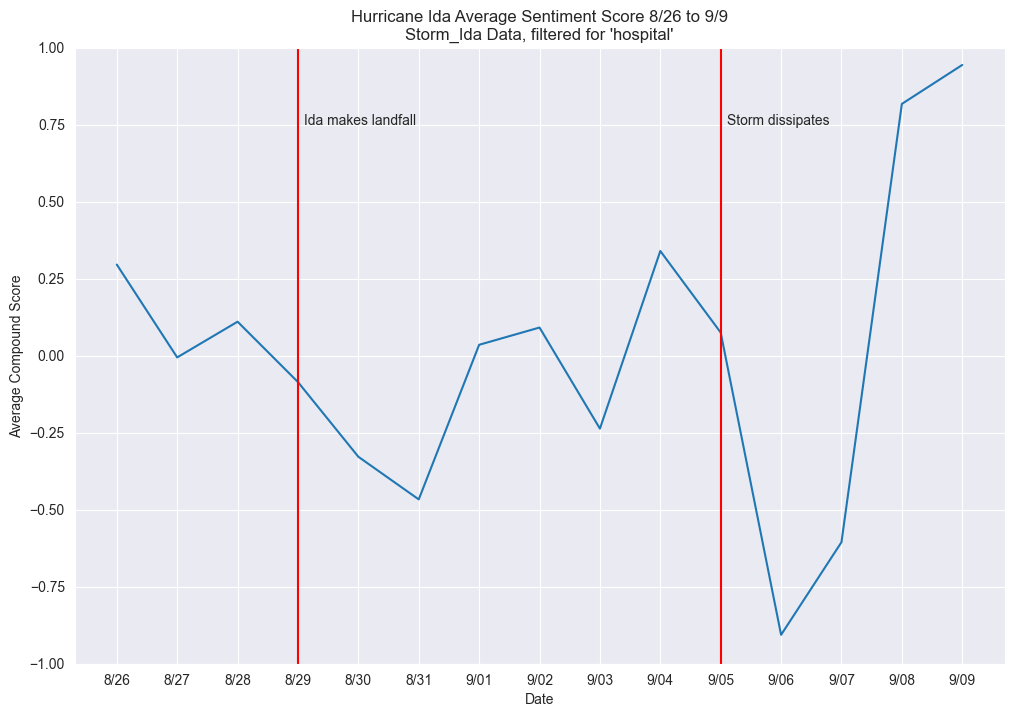

In [77]:
plt.figure(figsize=(12,8))
plt.plot(avg_sentiment)
dates = pd.date_range(start='08/26/2021', end='09/09/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(avg_sentiment)), formatted_dates)
plt.ylim([-1, 1])
plt.axvline(x=3, color='red')
plt.text(3.1,0.75,'Ida makes landfall')
plt.axvline(x=10, color='red')
plt.text(10.1,0.75,'Storm dissipates')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Hurricane Ida Average Sentiment Score 8/26 to 9/9\nStorm_Ida Data, filtered for \'hospital\'')
plt.show()

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

keywords = {'hospital':[], 'evacuate':[], 'closed':[], 'full':[], 'flood':[], 'victim':[]}
hospital_status = pd.DataFrame()

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df['text'] = [remove_urls(text).lower() for text in df['text']]
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)

    for hour in range(24):
        df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
        if len(df_sub['text']) > 0:
            for word in keywords:
                count = 0
                for sentence in df_sub['text']:
                    if word in sentence:
                        count += 1
                keywords[word].append(count)
        else:
            for word in keywords:
                keywords[word].append(0)

    start_date += delta

# print(keywords)

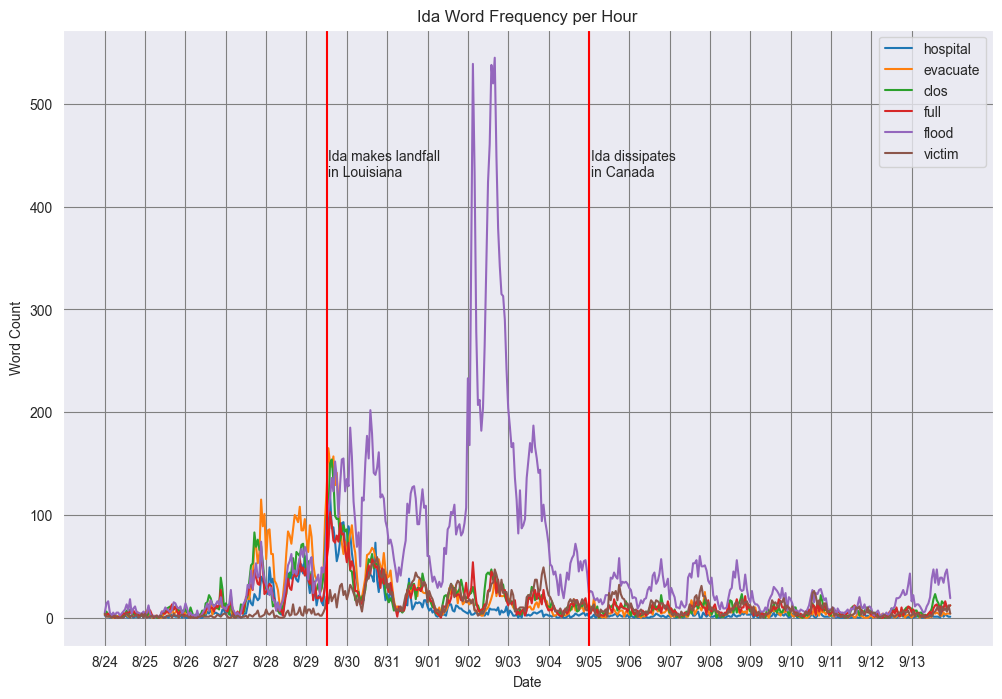

In [19]:
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(12,8))
plt.xticks(np.arange(0, len(keywords['hospital']), 24), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Ida Word Frequency per Hour')

for word in keywords:
    plt.plot(keywords[word])

bottom, top = plt.ylim()
landfall = len(dates) - 15.5
plt.axvline(x=24*landfall, color='red')
plt.text(24*landfall+1, top*.75, 'Ida makes landfall\nin Louisiana')
dissipation = len(dates) - 9
plt.axvline(x=24*dissipation, color='red')
plt.text(24*dissipation+1, top*.75, 'Ida dissipates\nin Canada')

plt.legend(keywords.keys())
plt.grid(color='gray')
plt.savefig('text data/Ida/word_frequency_ida.png')
plt.show()

# User Analysis

Extract unique tweets about hospital status from verified users.

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
keywords = {'hospital':[], 'evacuate':[], 'clos':[], 'full':[], 'flood':[], 'victim':[]}
select_users = pd.DataFrame()

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[~df['text'].str.startswith("RT @", na=False)].reset_index(drop=True)
    df['text'] = [remove_urls(text).lower() for text in df['text']]
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
    indices = []

    for i in range(len(df['text'])):
        tweet = df['text'][i].lower()
        for word in keywords.keys():
            if word in tweet:
                # select_users.append((df['user'][i], df['description'][i], df['location'][i], df['followers'][i], df['text'][i], df['time'][i]))
                indices.append(i)
                break

    select_users = pd.concat([select_users, df.loc[indices]])

    start_date += delta

In [13]:
# select_users = pd.DataFrame(select_users, columns=['username', 'biography', 'location', 'followers', 'tweet', 'time'])
select_users = select_users.reset_index(drop=True)
print(len(select_users))
select_users.head()

59244


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,24,MiaShellyMac,High Priestess of Theological-Thespian Banter ...,False,NOLA ✈️NEW YORK ✈️ CHARLOTTE,1537,Tue Aug 24 23:58:08 +0000 2021,1.430319e+18,thinking about the woman in atlanta who took m...,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46,BenrogersBen,American citizen wondering what’s going on in ...,False,NaN,1480,Tue Aug 24 23:56:10 +0000 2021,1.430318e+18,@georgetakei @jdvance1 you’re stupid. period. ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144,BenrogersBen,American citizen wondering what’s going on in ...,False,NaN,1480,Tue Aug 24 23:48:28 +0000 2021,1.430316e+18,@meidastouch also a segment on the americans s...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,182,WTGSFOX28,Fox 28 News at 10 is the only hour of news you...,True,"Savannah, GA",1090,Tue Aug 24 23:45:00 +0000 2021,1.430315e+18,widow of loretta lynn's ranch foreman recounts...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,217,__T__B__R__,“It is better to trust in the LORD than to put...,False,NaN,62,Tue Aug 24 23:41:44 +0000 2021,1.430314e+18,@jonahofninevah i've only felt the barometric ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
select_users2 = select_users.drop_duplicates(subset='user').reset_index(drop=True)
select_users2.dropna(subset=['location'], inplace=True)
select_users2 = select_users2[select_users2['location'].str.contains(',')].reset_index(drop=True)
select_users2 = select_users2[~select_users2['location'].str.contains('[0-9]|!|/')].reset_index(drop=True)
select_users2 = select_users2[select_users2['location'].str.contains('[A-Z]{2}$')].reset_index(drop=True)
print(len(select_users2))
select_users2.head()

12526


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,182,WTGSFOX28,Fox 28 News at 10 is the only hour of news you...,True,"Savannah, GA",1090,Tue Aug 24 23:45:00 +0000 2021,1.430315e+18,widow of loretta lynn's ranch foreman recounts...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,522,phuck_phame,you jus now gettin here.? #R2R #FreeDaGang #Ma...,False,"Jurassic Park, TX",61,Tue Aug 24 23:16:48 +0000 2021,1.430308e+18,damn it’s wet like a tub on me. hurricane harv...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,620,BillArning,contemporary art advisor and founder Bill Arni...,False,"Houston, TX",2518,Tue Aug 24 23:09:31 +0000 2021,1.430306e+18,"i closed my successful summer shows, took care...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,760,lfosson06,NaN,False,"Spring, TX",28,Tue Aug 24 22:59:27 +0000 2021,1.430304e+18,day ten of our awesome year is a look back to ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,775,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add lat/lon coordinates to locations listed in bio

In [20]:
sub = select_users2.drop_duplicates(subset='location')
sub = sub[~sub['location'].str.contains('\(|\)|&|→')]
print(len(sub))
sub.head()

2829


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,182,WTGSFOX28,Fox 28 News at 10 is the only hour of news you...,True,"Savannah, GA",1090,Tue Aug 24 23:45:00 +0000 2021,1.430315e+18,widow of loretta lynn's ranch foreman recounts...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,522,phuck_phame,you jus now gettin here.? #R2R #FreeDaGang #Ma...,False,"Jurassic Park, TX",61,Tue Aug 24 23:16:48 +0000 2021,1.430308e+18,damn it’s wet like a tub on me. hurricane harv...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,620,BillArning,contemporary art advisor and founder Bill Arni...,False,"Houston, TX",2518,Tue Aug 24 23:09:31 +0000 2021,1.430306e+18,"i closed my successful summer shows, took care...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,760,lfosson06,NaN,False,"Spring, TX",28,Tue Aug 24 22:59:27 +0000 2021,1.430304e+18,day ten of our awesome year is a look back to ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,775,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
sub = select_users[select_users['text'].str.lower().str.contains('hospital')]
sub = sub.drop_duplicates(subset='user')
sub = sub[sub['location'].str.contains(',')].reset_index(drop=True)
sub = sub[~sub['location'].str.contains('[0-9]|!|/|-')].reset_index(drop=True)
sub = sub[sub['location'].str.contains('[A-Z]{2}$')].reset_index(drop=True)
print(len(sub))
sub.head()

1198


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,775,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8072,greengrandma5,"Math is my gig. I'm 65, still learning. Pic is...",False,"Philadelphia, PA",941,Tue Aug 24 15:49:53 +0000 2021,1.430196e+18,"@jrubinblogger haiti has had double disasters,...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11316,alexa_carias,🇭🇳|| tpwk||⚖️||she/her||,False,"North Carolina, USA",162,Tue Aug 24 12:09:07 +0000 2021,1.430140e+18,+ imagine being sent to the hospital because y...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15273,precherzkid5050,"Retired X-ray Tech, Retired Medical Coder. Non...",False,"California, USA",47,Tue Aug 24 02:21:45 +0000 2021,1.429992e+18,@rodneyc18186863 @mismelissamarie these are th...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2310,LauraMiers,Pro-Kindness/Compassion/Love. Wealth inequalit...,False,"New York, USA",17210,Wed Aug 25 20:58:07 +0000 2021,1.430636e+18,houston: “hospitals are reaching a breaking po...,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
locations = sub.drop_duplicates(subset='location')['location'].reset_index(drop=True)
locations.head()

0            Hawaii, USA
1       Philadelphia, PA
2    North Carolina, USA
3        California, USA
4          New York, USA
Name: location, dtype: object

Get lat/lon coordinates from text

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# accepted = ['New York', 'New York City', 'Milwaukee', 'Seattle', 'Boston']

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    # elif name in accepted:
    #     return name
    else:
        return ''

def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return findGeocode(i)

# longitude = []
# latitude = []
coordinates = {}
cities = locations
cities = cities.apply(lambda x: get_city(str(x)))

# start at index 319
count = 0
for i in cities[count:]:
    if count == 166:
        break
    print(count)
    if findGeocode(i) is not None:
        loc = findGeocode(i)
        coordinates[i] = (loc.latitude, loc.longitude)
        # latitude.append(loc.latitude)
        # longitude.append(loc.longitude)
    else:
        coordinates[i] = np.nan
        # latitude.append(np.nan)
        # longitude.append(np.nan)
    count += 1

# select_users2['lat'] = latitude
# select_users2['lon'] = longitude
# select_users2
print(coordinates)

In [28]:
# nan = np.nan
# coordinates =

In [30]:
lat = []
lon = []

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    else:
        return ''

for loc in sub['location']:
    city = get_city(loc)
    if type(coordinates[city]) == tuple:
        lat.append(coordinates[str(city)][0])
        lon.append(coordinates[str(city)][1])
    else:
        lat.append(np.nan)
        lon.append(np.nan)
sub['lat'] = lat
sub['lon'] = lon

In [31]:
sub = sub.dropna(subset='lat').reset_index(drop=True)
print(len(sub))

1186


In [32]:
sub = sub[sub['lon'] < -50]
sub = sub[sub['lon'] > -140]
print(len(sub))

1134


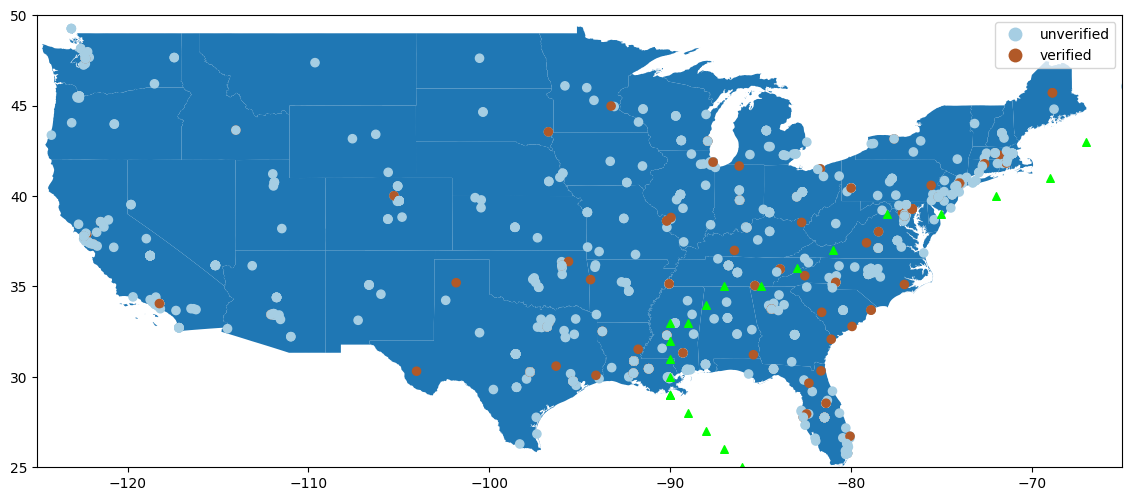

In [307]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(sub['lon'], sub['lat'])]
gdf = GeoDataFrame(sub, geometry=geometry)

ida_track = pd.read_csv('ida_track.csv')
ida_track['Lat'] = ida_track['Lat'].apply(lambda x: float(x[0:4]))
ida_track['Lon'] = ida_track['Lon'].apply(lambda x: -1 * float(x[0:4]))
geometry2 = [Point(xy) for xy in zip(ida_track['Lon'], ida_track['Lat'])]
ida_gdf = GeoDataFrame(ida_track, geometry=geometry2)

usa = gpd.read_file(r"C:\Users\xiaod\OneDrive\Desktop\Research\HurricaneProject\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
ax = usa.plot(figsize=(14,10))
# ax2 = gdf.plot(ax=ax, markersize=35, marker='o', label='pos')
ax2 = gdf.plot(ax=ax, column=sub['verified'], markersize=35, marker = 'o', label='pos', legend=True, cmap='Paired')
# for x, y, label, num in zip(sub['lon'], sub['lat'], sub['user'], sub['followers']):
#     if num > 10e5:
#         ax2.annotate(label, xy=(x, y), xytext=(-20, -10), textcoords="offset points")
ax3 = ida_gdf.plot(ax=ax, color='lime', markersize=30, marker='^', label='Ida Track')

ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)

# plt.savefig('user analysis/ida_hospital_users')
plt.show()

In [197]:
sub[sub['followers'] > 100000].sort_values(by='followers', ascending=False)

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
779,88824,washingtonpost,Democracy Dies in Darkness.,verified,"Washington, DC",18207941,Mon Aug 30 18:04:27 +0000 2021,1.432404e+18,hospitals in southeast louisiana took a beatin...,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.895037,-77.036543
768,68488,NBCNews,"News updates from around the 🌎, all day, every...",verified,"New York, NY",8601401,Mon Aug 30 19:07:03 +0000 2021,1.432420e+18,images: hurricane ida made landfall sunday in ...,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
438,119046,CBSNews,Your source for original reporting and trusted...,verified,"New York, NY",8199587,Sun Aug 29 20:40:01 +0000 2021,1.432081e+18,tracking ida: louisiana hospitals brace for af...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
969,4162,SkyNews,We take you to the heart of the stories that s...,verified,"London, UK",7284828,Tue Aug 31 23:24:45 +0000 2021,1.432847e+18,louisiana was already facing a #covid surge ev...,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.507336,-0.127650
811,157945,MarketWatch,"News, personal finance & commentary from Marke...",verified,"New York, NY",4069161,Mon Aug 30 14:31:22 +0000 2021,1.432350e+18,"louisiana’s hospitals, already packed with cov...",4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2677,newschannelnine,"Keeping you more aware, more prepared & better...",verified,"Chattanooga, TN",116524,Sun Aug 29 23:54:37 +0000 2021,1.432130e+18,"now that ida has made landfall, and families h...",4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.045722,-85.309488
769,70667,knoxnews,News from the Knoxville News Sentinel (https:/...,verified,"Knoxville, TN",106983,Mon Aug 30 19:00:13 +0000 2021,1.432418e+18,video posted to twitter showed a large section...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.960395,-83.921026
1007,89649,WRCB,Coverage You Can Count On.,verified,"Chattanooga, TN",105059,Tue Aug 31 13:03:01 +0000 2021,1.432690e+18,double impact: overwhelmed by a surge in covid...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.045722,-85.309488
227,81771,theadvocatebr,"The Advocate, a 2019 Pulitzer Prize winner for...",verified,"Baton Rouge, LA",104168,Sat Aug 28 16:30:31 +0000 2021,1.431655e+18,baton rouge hospitals are bracing for the comi...,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.449416,-91.186966


In [33]:
sub[sub['verified']]

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
11,333,BRProudNews,We are Baton Rouge proud. Powered by WVLA NBC ...,True,"Baton Rouge, LA",4502,2021-08-26 23:48:59+00:00,1.431041e+18,local hospitals prepare to balance covid-19 an...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.449416,-91.186966
33,1466,aliciavlozano,Native Angeleno covering CA & the West for @NB...,True,"Los Angeles, CA",1743,2021-08-27 23:49:27+00:00,1.431404e+18,"new orleans hospitals, residents brace for per...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.053691,-118.242766
36,3629,SteveHuff,"Deputy Digital Editor, @maximmag. Writer, jour...",True,"Worcester, MA",11209,2021-08-27 23:32:32+00:00,1.431399e+18,between covid-19 denialism leading to damn nea...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.262562,-71.801888
43,10315,fineout,Reporter with POLITICO who also tweets and fun...,True,"Tallahassee, FL",23562,2021-08-27 22:47:28+00:00,1.431388e+18,ap: officials decided against evacuating new o...,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.438083,-84.280933
45,12575,GanucheauAdam,Editor-in-chief @MSTodayNews.,True,"Jackson, MS",9060,2021-08-27 22:34:08+00:00,1.431385e+18,"mississippi gulf coast hospitals, overrun with...",2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.299869,-90.183041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,20202,ARCLouisiana,The American Red Cross prevents & alleviates h...,True,"Louisiana, USA",6155,2021-09-09 15:18:07+00:00,1.435986e+18,@exxonmobilbra @brfdn @brgeneral @ccdio_br @br...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.870388,-92.007126
1161,27626,Harpers,“Stranger and better than you might expect.” @...,True,"New York, NY",120783,2021-09-09 10:57:00+00:00,1.435920e+18,a judge in ohio reversed an emergency order th...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
1168,32058,GoTigers247,https://t.co/AStzhIglxt - Memphis affiliate fo...,True,"Memphis, TN",17892,2021-09-10 01:58:52+00:00,1.436147e+18,"after being displaced by the hurricane, @timdu...",17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.146025,-90.051764
1173,3624,wchs8fox11,WCHS-TV serves the Charleston-Huntington marke...,True,"Charleston, WV",71408,2021-09-11 20:21:02+00:00,1.436787e+18,hurricane emergency crews said they had to tra...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.788436,-79.939931


In [72]:
# verified_users.sort_values('followers', ascending=False)

,index,username,biography,location,followers,lat,lon
18,19,washingtonpost,Democracy Dies in Darkness.,"Washington, DC",18217739,38.895037,-77.036543
16,16,NBCNews,"News updates from around the 🌎, all day, every...","New York, NY",8606166,40.712728,-74.006015
22,32,ABCWorldNews,The official Twitter account for @ABC's World ...,New York,1516590,40.712728,-74.006015
33,44,MeetThePress,Meet the Press is the longest-running televisi...,"Washington, D.C.",653720,38.895037,-77.036543
9,9,FOX29philly,"We Go There. Get the latest Philadelphia news,...","Philadelphia, PA",614395,39.952724,-75.163526
2,2,FOX4,Breaking news & headlines from around North Te...,Dallas - Fort Worth,584601,32.776272,-96.796856
4,4,FOX26Houston,"Get the latest headlines from Houston news, sp...","Houston, Texas",334896,29.758938,-95.367697
10,10,FOX13News,"Bringing you the important stuff, like breakin...","Tampa, FL",328177,27.947760,-82.458444
6,6,FOX10Phoenix,"Phoenix breaking news, weather, politics, spor...","Phoenix, AZ",314608,33.448437,-112.074141
17,17,Poynter,"School for journalism and democracy, with twee...","St Petersburg, FL",219272,27.770380,-82.669509


In [304]:
import geopy.distance

In [34]:
sub['time'] = pd.to_datetime(sub['time'])
verified = sub[sub['verified']].reset_index(drop=True)
verified = verified[verified['time'] <= '2021-09-05 18:00:00+00:00']
verified = verified[verified['time'] >= '2021-08-26 12:00:00+00:00']
print(len(verified))
verified.head()

161


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
0,333,BRProudNews,We are Baton Rouge proud. Powered by WVLA NBC ...,True,"Baton Rouge, LA",4502,2021-08-26 23:48:59+00:00,1.431041e+18,local hospitals prepare to balance covid-19 an...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.449416,-91.186966
1,1466,aliciavlozano,Native Angeleno covering CA & the West for @NB...,True,"Los Angeles, CA",1743,2021-08-27 23:49:27+00:00,1.431404e+18,"new orleans hospitals, residents brace for per...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.053691,-118.242766
2,3629,SteveHuff,"Deputy Digital Editor, @maximmag. Writer, jour...",True,"Worcester, MA",11209,2021-08-27 23:32:32+00:00,1.431399e+18,between covid-19 denialism leading to damn nea...,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.262562,-71.801888
3,10315,fineout,Reporter with POLITICO who also tweets and fun...,True,"Tallahassee, FL",23562,2021-08-27 22:47:28+00:00,1.431388e+18,ap: officials decided against evacuating new o...,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.438083,-84.280933
4,12575,GanucheauAdam,Editor-in-chief @MSTodayNews.,True,"Jackson, MS",9060,2021-08-27 22:34:08+00:00,1.431385e+18,"mississippi gulf coast hospitals, overrun with...",2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.299869,-90.183041


In [309]:
ida_track['Time'] = ida_track['Time'].astype(str).str.zfill(4)
ida_track['datetime'] = ida_track['Date'].astype(str) + ' ' + ida_track['Time'].astype(str)
ida_track['datetime'] = pd.to_datetime(ida_track['datetime'])
ida_track.head()

,Date,Time,,,Lat,Lon,Max Wind,Min Pressure,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Max Wind Radius,datetime
0,20210826,1200,,TD,16.0,-78.0,30,1006,0,0,...,0,0,0,0,0,0,0,0,60,2021-08-26 12:00:00
1,20210826,1800,,TS,17.0,-79.0,35,1006,60,0,...,0,0,0,0,0,0,0,0,50,2021-08-26 18:00:00
2,20210827,0000,,TS,18.0,-80.0,40,1004,60,0,...,0,0,0,0,0,0,0,0,50,2021-08-27 00:00:00
3,20210827,0600,,TS,19.0,-80.0,45,1002,70,0,...,0,0,0,0,0,0,0,0,40,2021-08-27 06:00:00
4,20210827,1200,,TS,20.0,-81.0,55,996,80,60,...,30,0,0,0,0,0,0,0,30,2021-08-27 12:00:00


In [310]:
distances = []
for i in range(len(verified)):
    track_sub = ida_track[ida_track['datetime'].astype(str) <= str(verified['time'][i])]
    c1 = (verified['lat'][i], verified['lon'][i])
    c2 = (track_sub['Lat'][len(track_sub) - 1], track_sub['Lon'][len(track_sub) - 1])
    distances.append(geopy.distance.geodesic(c1, c2).km)

In [ ]:
print(distances)

In [312]:
print(pd.Series(distances).describe())

count     161.000000
mean     1407.789147
std       833.146060
min        84.330956
25%       772.777306
50%      1316.198727
75%      1950.576200
max      4361.979679
dtype: float64


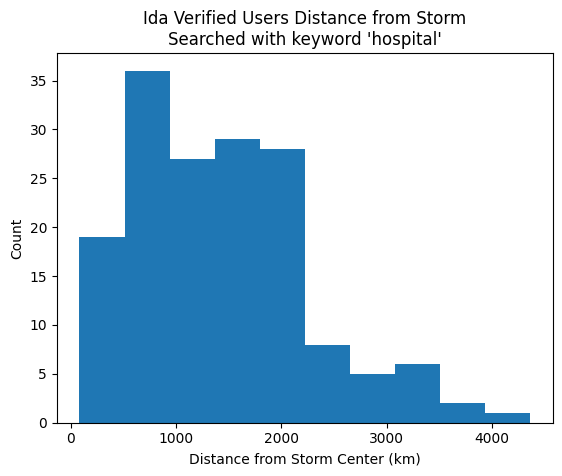

In [320]:
plt.hist(distances)
plt.title('Ida Verified Users Distance from Storm\nSearched with keyword \'hospital\'')
plt.xlabel('Distance from Storm Center (km)')
plt.ylabel('Count')
plt.savefig('user analysis/ida_hospital_verified.png')
plt.show()

In [35]:
unverified = sub[~sub['verified']].reset_index(drop=True)
unverified = unverified[unverified['time'] <= '2021-09-04 18:00:00+00:00']
unverified = unverified[unverified['time'] >= '2021-08-26 12:00:00+00:00'].reset_index(drop=True)
print(len(unverified))

900


In [316]:
distances2 = []
for i in range(len(unverified)):
    track_sub = ida_track[ida_track['datetime'].astype(str) <= str(unverified['time'][i])]
    c1 = (unverified['lat'][i], unverified['lon'][i])
    c2 = (track_sub['Lat'][len(track_sub) - 1], track_sub['Lon'][len(track_sub) - 1])
    distances2.append(geopy.distance.geodesic(c1, c2).km)

In [ ]:
print(distances2)

In [317]:
print(pd.Series(distances2).describe())

count     900.000000
mean     1728.588827
std       990.502484
min         8.002603
25%       940.379736
50%      1600.668217
75%      2272.650661
max      5282.184661
dtype: float64


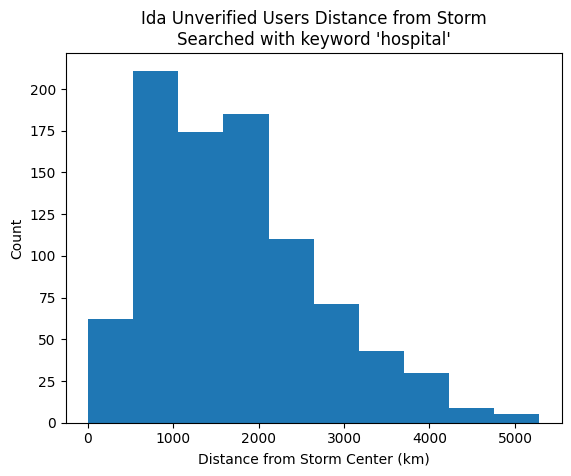

In [321]:
plt.hist(distances2)
plt.title('Ida Unverified Users Distance from Storm\nSearched with keyword \'hospital\'')
plt.xlabel('Distance from Storm Center (km)')
plt.ylabel('Count')
plt.savefig('user analysis/ida_hospital_unverified.png')
plt.show()

Verified users tend to be closer to storm track than unverified users.

# T-test

Assumptions:
-two groups are independent of each other
-both distributions are normal
-equal variance

In [5]:
import scipy.stats as stats
stats.ttest_ind(distances, distances2)

Ttest_indResult(statistic=-3.8714121494261673, pvalue=0.00011482999243032483)

Since the p-value is less than 0.05, we can reject our null hypothesis and conclude that the population means of the two distributions are note equal.

# Distance vs. Followers

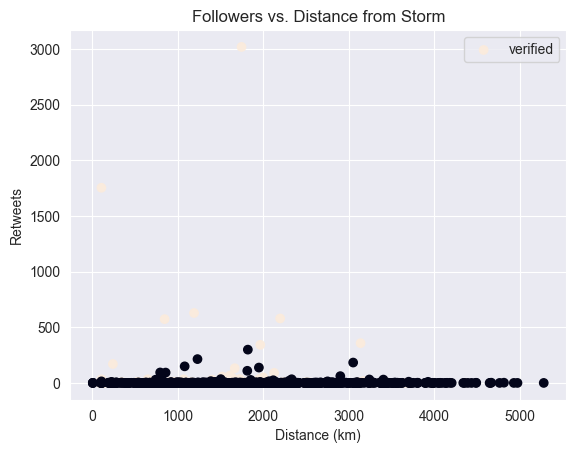

In [40]:
# verified['distance'] = distances
# unverified['distance'] = distances2
combined = pd.concat([verified, unverified])
# combined2 = combined[combined['followers'] <= 1e5]
plt.scatter(x=combined['distance'], y=combined['retweet'], c=combined['verified'])
plt.legend(labels=['verified', 'unverified'])
plt.title('Followers vs. Distance from Storm')
plt.xlabel('Distance (km)')
plt.ylabel('Retweets')
# plt.savefig('user analysis/ida_hospital_followers.png')
plt.show()

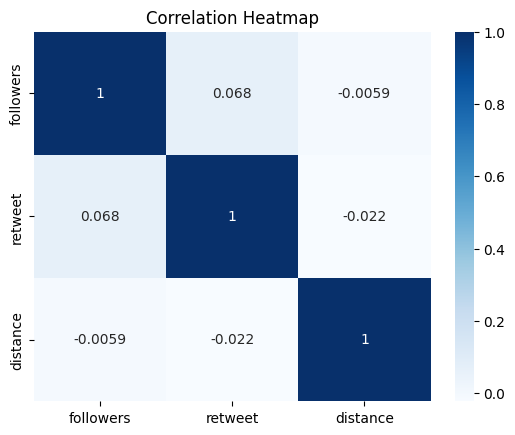

In [346]:
import seaborn as sb
corr = combined.loc[:, ['followers', 'retweet', 'distance']].corr()
sb.heatmap(corr, cmap="Blues", annot=True).set(title='Correlation Heatmap')
plt.savefig('user analysis/Heatmap.png')
plt.show()

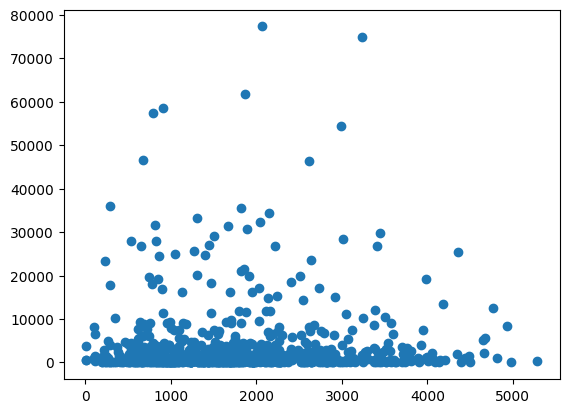

In [347]:
plt.scatter(x=unverified[unverified['followers'] < 1e5]['distance'], y=unverified[unverified['followers'] < 1e5]['followers'])
plt.show()

# Non-verified Users

In [74]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
non_verified = []

while start_date <= end_date:
    df = pd.read_excel(r"C:\Users\xiaod\Downloads\Hurricane Ida\Hurricane Ida\storm ida_" + str(start_date) + ".xlsx")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df = df.drop_duplicates(subset=['text'])
    df = df.reset_index(drop=True)

    for i in range(len(df['text'])):
        tweet = df['text'][i]
        for word in keywords:
            if word in tweet and 'hospital' in tweet:
                if not df['verified'][i]:
                    non_verified.append((df['user'][i], df['description'][i], df['location'][i], df['followers'][i]))
                break

    start_date += delta

non_verified_users = pd.DataFrame(non_verified, columns=['username', 'biography', 'location', 'followers'])
non_verified_users = non_verified_users.drop_duplicates(subset='username')
non_verified_users

,username,biography,location,followers
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697
2,WestergrenJon,Proud I'm in the Resistance Progressive Proud ...,NaN,14483
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611
...,...,...,...,...
131,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501
132,fraterphoenix,The best way to know me is by reading my stories.,NaN,18
133,EWTNVatican,News + Updates from the heart of the Catholic ...,NaN,35025
134,JoeKanter,Louisiana Department of Health. ER doc and for...,NaN,3302


In [76]:
non_verified_users = non_verified_users.reset_index(drop=True)
non_verified_users = non_verified_users.dropna()
non_verified_users

,username,biography,location,followers
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611
5,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27
...,...,...,...,...
75,ServingIntel,Customized #technology solutions for #hospital...,Guaranteed ROI!,802
77,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351
78,Vicky_no_secret,"God first, Driven, Determined, passionate, edu...",Johns Island/Charleston,150
79,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501


In [78]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

accepted = ['New York', 'New York City', 'Milwaukee', 'Seattle']

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    else:
        return ''

longitude = []
latitude = []
cities = non_verified_users['location']
cities = cities.apply(lambda x: get_city(str(x)))

def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return findGeocode(city)

for i in cities:
    if findGeocode(i) is not None:
        loc = findGeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

non_verified_users['lat'] = latitude
non_verified_users['lon'] = longitude
non_verified_users

,username,biography,location,followers,lat,lon
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498,NaN,NaN
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697,NaN,NaN
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220,37.566679,126.978291
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611,31.263890,-98.545612
5,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27,32.329381,-83.113737
...,...,...,...,...,...,...
75,ServingIntel,Customized #technology solutions for #hospital...,Guaranteed ROI!,802,NaN,NaN
77,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351,40.712728,-74.006015
78,Vicky_no_secret,"God first, Driven, Determined, passionate, edu...",Johns Island/Charleston,150,NaN,NaN
79,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501,37.779026,-122.419906


In [82]:
non_verified_users = non_verified_users.dropna()
non_verified_users = non_verified_users.reset_index(drop=True)
non_verified_users

,username,biography,location,followers,lat,lon
0,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220,37.566679,126.978291
1,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611,31.263890,-98.545612
2,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27,32.329381,-83.113737
3,AmberSchmidtke,"College professor, medical educator, public he...","Kansas, USA",6913,38.273120,-98.582187
4,pamelarwalker,"Health, public health, natural resources, emer...","St. Louis, Mo.",4335,38.628028,-90.191015
5,draughon_vickie,I have 3 beautiful children and 3 grandbabies ...,"Mississippi, USA",84,32.971528,-89.734850
6,ninigirl84,"Recovering conservative,1A extremist cat lady,...","Dallas, tx",4097,32.776272,-96.796856
7,hannahalabamaa,24 || Married || Long haul COVID advocate || 🏳️‍🌈,"Birmingham, AL",477,52.479699,-1.902691
8,ChristopherNFox,"Work at @CeresNews for social justice, sustain...","Boston, MA",18448,42.355433,-71.060511
9,StuOnGold,47 years trading at CBOT/CME/COMEX. Former Ser...,"Ventura County, CA.",2223,34.445825,-119.077936


(25.0, 50.0)

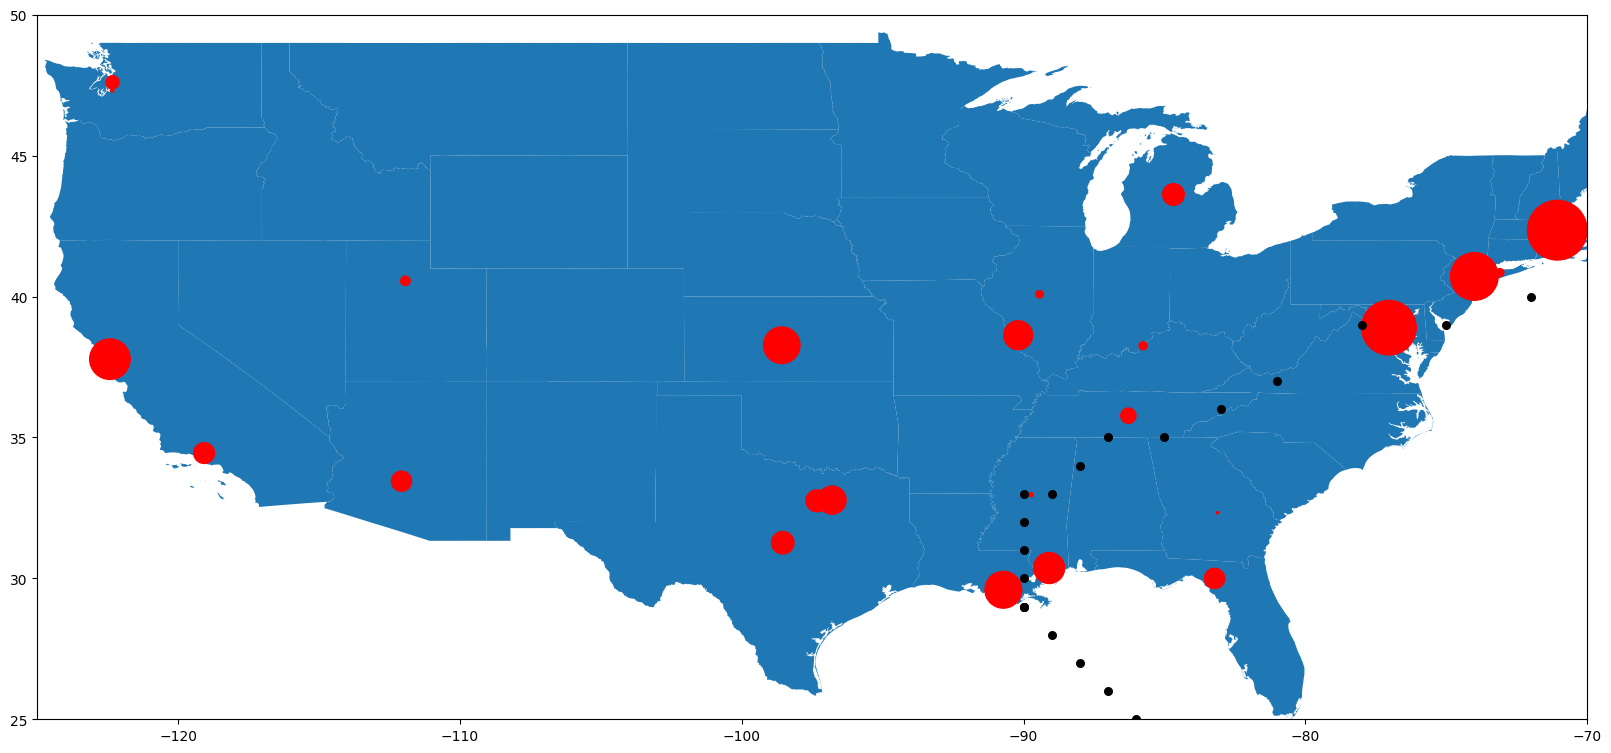

In [85]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(non_verified_users['lon'], non_verified_users['lat'])]
gdf = GeoDataFrame(non_verified_users, geometry=geometry)
ida_track = pd.read_csv('ida_track.csv')
ida_track['Lat'] = ida_track['Lat'].apply(lambda x: float(x[0:4]))
ida_track['Lon'] = ida_track['Lon'].apply(lambda x: -1 * float(x[0:4]))
geometry2 = [Point(xy) for xy in zip(ida_track['Lon'], ida_track['Lat'])]
ida_gdf = GeoDataFrame(ida_track, geometry=geometry2)

usa = gpd.read_file(r"C:\Users\xiaod\OneDrive\Desktop\Research\HurricaneProject\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
ax = usa.plot(figsize=(20,15))
gdf.plot(ax=ax, color='red', markersize=non_verified_users['followers']/10, marker = 'o', label= 'pos')
ida_gdf.plot(ax=ax, color='black', markersize=30)

ax.set_xlim(-125, -70)
ax.set_ylim(25, 50)

In [87]:
non_verified_users.sort_values(by='followers', ascending=False)

,username,biography,location,followers,lat,lon
8,ChristopherNFox,"Work at @CeresNews for social justice, sustain...","Boston, MA",18448,42.355433,-71.060511
20,bhrenton,Tracking vaccine rollout with @VermontDFR and ...,"Washington, DC",15429,38.895037,-77.036543
28,allidoismix,Real-Time News & Commentary 24/7/365 🌎🌍🌏\nCryp...,"New York, NY",11749,40.712728,-74.006015
15,InhellJourney,RESISTER. vaccinated; Biden/Harris. DEM. Inves...,"Washington, USA",9302,38.895037,-77.036543
34,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501,37.779026,-122.419906
27,HoumaToday,Newspaper in southern Louisiana providing comp...,"Houma, La.",7011,29.595770,-90.719535
3,AmberSchmidtke,"College professor, medical educator, public he...","Kansas, USA",6913,38.273120,-98.582187
33,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351,40.712728,-74.006015
19,ProfCiara,Curious about how the world works. Focused on ...,"Gulfport, FL",4967,30.367420,-89.092816
4,pamelarwalker,"Health, public health, natural resources, emer...","St. Louis, Mo.",4335,38.628028,-90.191015


# Individual Accounts Analysis

In [79]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

official = ['fema']

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")

    for i in range(len(df['text'])):
        if df['user'][i] in official:
            print('Time:', str(df['time'][i]), 'User:', df['user'][i])
            print(df['text'][i], '\n')

    start_date += delta

Time: Fri Aug 27 20:43:51 +0000 2021 User: fema
RT @distressline: If you live in an area forecast for possible impacts from Tropical Storm #Ida &amp; are feeling anxious, overwhelmed, isolated or other distress, you're not alone. The national Disaster @Distressline 1-800-985-5990 offers 24/7 emotional support. https://t.co/WxhWnLX8Wq #TalkWithUs 📲 

Time: Fri Aug 27 20:43:18 +0000 2021 User: fema
RT @CDCEnvironment: Depending on the path of a #storm or #hurricane, your home may not be the safest place to be. 

Be prepared to go if asked to evacuate by local authorities. 

Here are a few things you can do to help improve your evacuation time: https://t.co/6IT2pnXA71. #Ida https://t.co/BjKrlQSKTd 

Time: Fri Aug 27 19:44:15 +0000 2021 User: fema
RT @MSEMA: Mississippi, now is the time to build your disaster supply kit in preparation of Ida. 
This is a storm that could impact not just the coast but central and northern portions of the state. 
The First 72 Is On You! #HurricaneIda https://

In [41]:
df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-08-27.csv")
popular_tweets = df[df['retweet'] >= 100]
popular_tweets['text'] = popular_tweets['text'].astype('str')
popular_tweets = popular_tweets.drop_duplicates(subset='text').reset_index(drop=True)
popular_tweets

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,1,DivaKnevil,Vegan 🌱 Gin-Soaked Secular Humanist. An Ex-Pat...,False,Washington D.C,2528,Fri Aug 27 23:59:54 +0000 2021,1.431406e+18,"RT @POTUS: This afternoon, I held a call with ...",4260,...,NaN,13781071.0,Fri Aug 27 22:31:17 +0000 2021,1.431384e+18,"This afternoon, I held a call with the head of...",4260.0,NaN,en,NaN,NaN
1,2,TheresaC1231,"A0C Director, Animal lover, will add ALMOST al...",False,NaN,1315,Fri Aug 27 23:59:52 +0000 2021,1.431406e+18,RT @StrictlyChristo: Hurricane Ida is a myth‼️...,209,...,"Santa Cruz, California",23986.0,Fri Aug 27 23:42:53 +0000 2021,1.431402e+18,Hurricane Ida is a myth‼️\n\nDon't get fooled!...,209.0,NaN,en,NaN,NaN
2,4,CharityChicken,I cross Ohio roads for charitable health cause...,False,"Dayton, OH",2203,Fri Aug 27 23:59:49 +0000 2021,1.431406e+18,RT @blkahn: Hurricane Ida is going to follow a...,155,...,NYC,37810.0,Fri Aug 27 19:39:36 +0000 2021,1.431341e+18,Hurricane Ida is going to follow a trail of ho...,155.0,NaN,en,NaN,NaN
3,9,CharityChicken,I cross Ohio roads for charitable health cause...,False,"Dayton, OH",2203,Fri Aug 27 23:59:32 +0000 2021,1.431406e+18,RT @NBCNews: BREAKING: Hurricane Ida now forec...,451,...,"New York, NY",8605369.0,Fri Aug 27 21:02:38 +0000 2021,1.431362e+18,BREAKING: Hurricane Ida now forecast to streng...,451.0,NaN,en,NaN,NaN
4,14,BTRWx,B.S. in Earth Science (Atmospheric Science Con...,False,"Alexandria, VA (FFX Cnty)",871,Fri Aug 27 23:59:22 +0000 2021,1.431406e+18,RT @NHC_Atlantic: Hurricane #Ida is approachin...,562,...,"Miami, FL",978388.0,Fri Aug 27 21:03:09 +0000 2021,1.431362e+18,Hurricane #Ida is approaching western Cuba and...,562.0,NaN,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,27367,AP,"News from The Associated Press, and a taste of...",True,Global,15292044,Fri Aug 27 03:11:45 +0000 2021,1.431092e+18,BREAKING: Forecasters say a hurricane watch ha...,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,27601,NWSNewOrleans,Official Twitter account for the National Weat...,True,"New Orleans, Louisiana",67767,Fri Aug 27 03:01:07 +0000 2021,1.431089e+18,🌀 10:00 p.m.: Here is the latest forecast from...,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,27846,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978414,Fri Aug 27 02:52:03 +0000 2021,1.431087e+18,Tropical Storm #Ida Advisory 3: Hurricane Watc...,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,28228,NOLAnews,Latest news and updates from the Pulitzer Priz...,True,"New Orleans, LA",270609,Fri Aug 27 02:00:18 +0000 2021,1.431074e+18,Three major Sewerage &amp; Water Board pumps a...,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
popular_tweets = popular_tweets[~popular_tweets['text'].str.startswith("RT @", na=False)]
popular_tweets.sort_values(by='retweet', ascending=False)

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
35,2855,POTUS,"46th President of the United States, husband t...",True,NaN,13781072,Fri Aug 27 22:31:17 +0000 2021,1.431384e+18,"This afternoon, I held a call with the head of...",4260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,13826,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978407,Fri Aug 27 17:16:58 +0000 2021,1.431305e+18,1:15 PM EDT: Data from an Air Force Reserve Hu...,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,6390,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978388,Fri Aug 27 21:03:09 +0000 2021,1.431362e+18,Hurricane #Ida is approaching western Cuba and...,562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,24510,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978413,Fri Aug 27 09:47:56 +0000 2021,1.431192e+18,Here are the 5 AM EDT August 27th Key Messages...,522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,6424,NBCNews,"News updates from around the 🌎, all day, every...",True,"New York, NY",8605370,Fri Aug 27 21:02:38 +0000 2021,1.431362e+18,BREAKING: Hurricane Ida now forecast to streng...,451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,13670,weatherchannel,The World's Leading Weather Provider. Home to ...,True,"Atlanta, GA",3920323,Fri Aug 27 17:18:30 +0000 2021,1.431305e+18,BREAKING: #Ida has rapidly intensified and is ...,441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,9337,fema,Our story of supporting citizens & first respo...,True,United States,823912,Fri Aug 27 19:16:04 +0000 2021,1.431335e+18,We are monitoring the development and path of ...,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,18085,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978410,Fri Aug 27 15:11:51 +0000 2021,1.431273e+18,Ida has strengthened into a 65-mph tropical st...,383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,22944,Sheril_,"Scientist & author. Climate x Ag, Politics & S...",True,NaN,14386,Fri Aug 27 11:44:57 +0000 2021,1.431221e+18,Gulf waters are warm which worries me watching...,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,9482,SteveWAFB,AMS certified meteorologist at @WAFB in Baton ...,True,"Baton Rouge, LA",14695,Fri Aug 27 19:09:25 +0000 2021,1.431333e+18,Multiple models now taking #Ida to Cat. 4 inte...,312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
